In [219]:
import pandas as pd
import numpy as np
from plotnine import *
import plotly.express as px
import plotly
from geopandas import GeoDataFrame
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import *
import matplotlib.pyplot as plt  
import matplotlib.backend_bases
import pandas_profiling

## Generate pandas profile and export to HTML to explore dataset

In [3]:
df_nona = pd.read_csv("processed_data/df_nona.csv")

In [5]:
df_nona_profile = df_nona.profile_report()

In [6]:
df_nona_profile.to_file(output_file='df_nona_profile.html')

### Question: How does customer density for different states compare to grid reliability?

In [19]:
len(df_19.state.unique())

51

In [8]:
df_19 = pd.read_csv("processed_data/df_19.csv")

In [14]:
fig = px.scatter_geo(
    df_19.fillna(0), 
    locations ="state", 
    locationmode = 'USA-states',
    color="saidi_nomed",
    size="total_cust",
    # what is the size of the biggest scatter point
    size_max = 60,
    projection="natural earth",
    # range, important to keep the same range on all charts
    range_color=(0, 160),
    # columns which is in bold in the pop up
    hover_name = "state",
    # format of the popup to display these columns' data
    hover_data = {"state":False,
                 "name":True}
                     )

fig.update_geos(scope='usa',
            projection_type='albers usa')
fig.update_layout(title="Grid Reliability in the 50 States", title_x=0.5)
fig.show()
#fig.write_image("map_trial.png")

#plotly.offline.plot(fig, filename='map_trial.png')

In [63]:
df_19.describe()

,no,customers,saidi_nomed,saifi_nomed,caidi_nomed,pv_mw,pv_storage_mw,virtual_mw,wind_mw,all_tech_mw,ee_savings_mw,peak_savings_mw,dem_res_customers,dem_res_savings_mwh
count,770.000000,7.700000e+02,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,7.700000e+02,770.000000,770.000000,770.000000
mean,12294.633766,1.544447e+05,138.782414,1.163474,95.765853,28.165491,0.321249,0.791822,0.260487,29.847940,3.113068e+04,7.566097,13388.080519,1702.947826
std,8554.785067,4.766155e+05,140.956411,1.034872,63.567703,201.309299,4.461121,12.714171,2.135177,211.537199,1.324301e+05,33.253440,72183.367329,35740.719514
min,97.000000,4.100000e+01,0.655000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,5879.000000,1.107900e+04,55.798000,0.507750,66.627713,0.010000,0.000000,0.000000,0.000000,0.022750,0.000000e+00,0.000000,0.000000,0.000000
50%,12264.000000,2.409100e+04,99.848500,0.995500,91.777437,0.349500,0.000000,0.000000,0.000000,0.456000,0.000000e+00,0.000000,0.000000,0.000000
75%,16733.000000,6.557075e+04,170.164250,1.528000,120.542700,2.215500,0.000000,0.000000,0.027000,2.671750,1.573815e+03,0.351250,76.000000,0.000000
max,60839.000000,5.589368e+06,1239.300000,12.386000,1075.000000,4265.184000,96.415000,343.869000,40.337000,4473.646000,2.097423e+06,436.743000,895133.000000,977215.000000


## Get net metering pct by state

In [111]:
df_19_total_nm = df_19.filter(["state","total_mwh",'nm_mwh']).groupby("state", as_index=False).sum()

In [122]:
df_19_total_nm["nm_pct"] = ((df_19_total_nm.nm_mwh/df_19_total_nm.total_mwh)*100)

### Get average SAIDI by state

In [11]:
df_nona.groupby('type').mean().filter(['type','saidi_nomed']).sort_values(by='saidi_nomed')

,saidi_nomed
type,
State,20.968600
Municipal,42.939630
Political Subdivision,89.496211
Investor Owned,112.303122
Cooperative,118.632288


In [54]:
df_19_avg_saidi = df_19.filter(["state","saidi_nomed"]).groupby("state", as_index=False).mean()

In [61]:
df_19_avg_saidi.describe()

,saidi_nomed
count,51.000000
mean,144.560692
std,70.390899
min,44.186133
25%,102.571959
50%,140.785946
75%,164.002722
max,448.277714


In [276]:
fig = px.choropleth(df_19_avg_saidi, locations= "state",
                    color="saidi_nomed", 
                    hover_name="state", 
                    locationmode="USA-states",
                    range_color=(45, 450),
                    color_continuous_scale= ['lightgrey',"darkblue"],
                   labels={
                     "saidi_nomed": "SAIDI Score"
                 })

fig.update_geos(scope='usa',
            projection_type='albers usa')
fig.update_layout(title="Average SAIDI in the U.S. by State (2019)", title_x=0.5)


fig.write_image('./deliverables/2019_avg_saidi_map.png')

In [126]:
df_19_total_nm.describe()

,total_mwh,nm_mwh,nm_pct
count,5.100000e+01,51.000000,51.000000
mean,4.328008e+07,24712.323314,0.138524
std,4.161934e+07,80684.192048,0.759556
min,4.509370e+05,0.000000,0.000000
25%,1.314040e+07,114.267500,0.000580
50%,3.097490e+07,1557.133000,0.003932
75%,6.256102e+07,6417.016500,0.023121
max,1.983226e+08,536558.918000,5.405152


In [278]:
fig = px.choropleth(df_19_total_nm, locations= "state",
                    color="nm_pct", 
                    hover_name="state", 
                    locationmode="USA-states",
                    range_color=(0, 0.05),
                    color_continuous_scale= ['lightgrey',"darkblue"],
                   labels={
                     "nm_pct": "Net-Metering as % <br>of Total MWh Sold"
                 })

fig.update_geos(scope='usa',
            projection_type='albers usa')
fig.update_layout(title="Net-Metered Generation in the U.S. by State (2019)", title_x=0.5)

fig.write_image('./deliverables/2019_nm_map.png')

In [192]:
df_19_types = df_19.groupby('type', as_index=False).count().filter(["type","name"])

In [198]:
df_19_types.loc[3]= ["Other", 23]

In [207]:
df_19_types.drop(df_19_types.tail(1).index,inplace=True) # drop last n rows

In [208]:
df_19_types

,type,name
0,Cooperative,402
1,Investor Owned,138
2,Municipal,204
3,Other,23


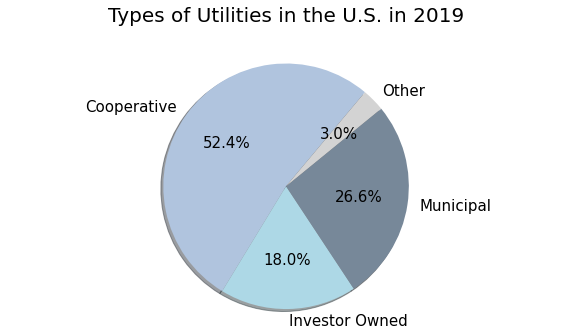

In [283]:
#explode = (0.1,0) # Explode 1st slice


color = ["lightsteelblue","lightblue","lightslategrey","lightgrey"]
#color = plt.cm.Set2(np.linspace(0, 1, 12))

plt.figure(figsize = (10,5))
plt.pie(df_19_types['name'], labels = df_19_types['type'],
        autopct = '%1.1f%%', shadow = True, startangle = 50,
       pctdistance = 0.6,
       colors = color,
       textprops={'fontsize': 15})
plt.title('Types of Utilities in the U.S. in 2019\n', fontsize=20) # Title
plt.axis('equal')

plt.savefig('./deliverables/2019_utility_types.png', bbox_inches="tight")